In [ ]:
#| default_exp bapps

# Loading BAPPS

> Loading BAPPS from our private server.

In [ ]:
#| export
import re

import pandas as pd
# from pathlib import Path
# from natsort import natsorted
from fastcore.basics import Path
from fastcore.foundation import L

TID2013 is already present on our server, but one may find it a little bit confusing to load: there is a `mos_with_names.txt` file that connects each distorted image with its MOS, the reference images are in the `reference_images` foldes, and the distorted images are in the `distorted_images` folder. This means that we will have to load both folders and connect the corresponding images with the `mos_with_names.txt` file.

Another important thing to note is that each distorted image is named in a meaningful way: `I(img_id)_(dist_id)_(dist_int).bmp`, so we may use that information at our discretion. Leaving complicated filterings aside, we can start by loading all the images and connecting them.

In [ ]:
#| hide
path_root = Path("/lustre/ific.uv.es/ml/uv075/Databases/IQA/BAPPS/")
path_csv = path_root.joinpath("data_bapps_extra.csv")

Following the usual approach, we are going to try to build a `.csv` file relating each reference image, its distortions and the corresponding MOS. By doing so, we reduce a lot the possible complications when loading the data because it will be all paired. The idea is that we are going to fetch all the image paths and then will pair them using the `.txt` files:

In [ ]:
df = pd.read_csv(path_csv)
df.head()

,Reference,Image_0,Image_1,Preference,Label
0,2afc/val/frameinterp/ref/000000.png,2afc/val/frameinterp/p0/000000.png,2afc/val/frameinterp/p1/000000.png,0.0,0
1,2afc/val/frameinterp/ref/000001.png,2afc/val/frameinterp/p0/000001.png,2afc/val/frameinterp/p1/000001.png,0.0,0
2,2afc/val/frameinterp/ref/000002.png,2afc/val/frameinterp/p0/000002.png,2afc/val/frameinterp/p1/000002.png,0.8,1
3,2afc/val/frameinterp/ref/000003.png,2afc/val/frameinterp/p0/000003.png,2afc/val/frameinterp/p1/000003.png,0.8,1
4,2afc/val/frameinterp/ref/000004.png,2afc/val/frameinterp/p0/000004.png,2afc/val/frameinterp/p1/000004.png,0.8,1


In [ ]:
#| notest
from PIL import Image
from tqdm.auto import tqdm

for row in tqdm(df.itertuples(), total=len(df)):
    img = Image.open(path_root.joinpath(row.Reference))
    dist_0 = Image.open(path_root.joinpath(row.Image_0))
    dist_1 = Image.open(path_root.joinpath(row.Image_1))
    break
print("All images could be loaded without issues!")

  0%|          | 0/36344 [00:00<?, ?it/s]

All images could be loaded without issues!


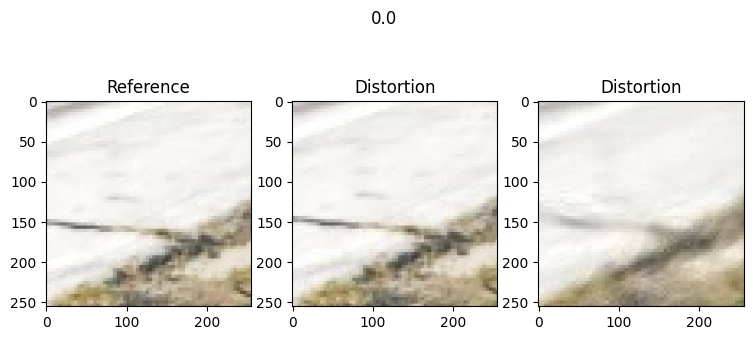

In [ ]:
#| notest
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,3,figsize=(9,4))
axes[0].imshow(img)
axes[0].set_title("Reference")
axes[1].imshow(dist_0)
axes[1].set_title("Distortion")
axes[2].imshow(dist_1)
axes[2].set_title("Distortion")
plt.suptitle(row.Preference)
plt.show()

## Adding extra information

> In order to be able to filter our data by distortion or intensity, we can explicify this information in new columns to ease the process.

In [ ]:
df["Distortion_Type"] = df.Reference.apply(lambda x: re.search(r"val/(\w+)", x).group(1))
assert len(df.Distortion_Type.unique()) == 6
df.head()

,Reference,Image_0,Image_1,Preference,Label,Distortion_Type
0,2afc/val/frameinterp/ref/000000.png,2afc/val/frameinterp/p0/000000.png,2afc/val/frameinterp/p1/000000.png,0.0,0,frameinterp
1,2afc/val/frameinterp/ref/000001.png,2afc/val/frameinterp/p0/000001.png,2afc/val/frameinterp/p1/000001.png,0.0,0,frameinterp
2,2afc/val/frameinterp/ref/000002.png,2afc/val/frameinterp/p0/000002.png,2afc/val/frameinterp/p1/000002.png,0.8,1,frameinterp
3,2afc/val/frameinterp/ref/000003.png,2afc/val/frameinterp/p0/000003.png,2afc/val/frameinterp/p1/000003.png,0.8,1,frameinterp
4,2afc/val/frameinterp/ref/000004.png,2afc/val/frameinterp/p0/000004.png,2afc/val/frameinterp/p1/000004.png,0.8,1,frameinterp


In [ ]:
#| notest
# df.to_csv(path_root.joinpath("data_bapps_extra.csv"), index=False)